In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.
import sys
from scripts.pipeline import Pipeline
from src.visualization.plot_helper import plot_capacity_degradation, plot_cycle_attribute, plot_result

%load_ext autoreload
%autoreload 2

# Basic Usage

## Create pipeline

In [2]:
# Create a pipeline with a configuration file, specifying the device and workspace. 
# Developers need to modify the data, feature, model and other related settings in the config file in advance. 
pipeline = Pipeline(config_path='configs/baselines/nn_models/cnn/mix-full-model.yaml',
                    device='cpu',
                    workspace='workspaces')

Seed is set to 0.


Info: Load datasets from cache cache/battery_cache_4d3f2447305a06a3260fa387f496fd0a.pkl.


## Plot train and test data

In [74]:
# get raw data from pipeline
train_cells, test_cells  = pipeline.train_cells, pipeline.test_cells

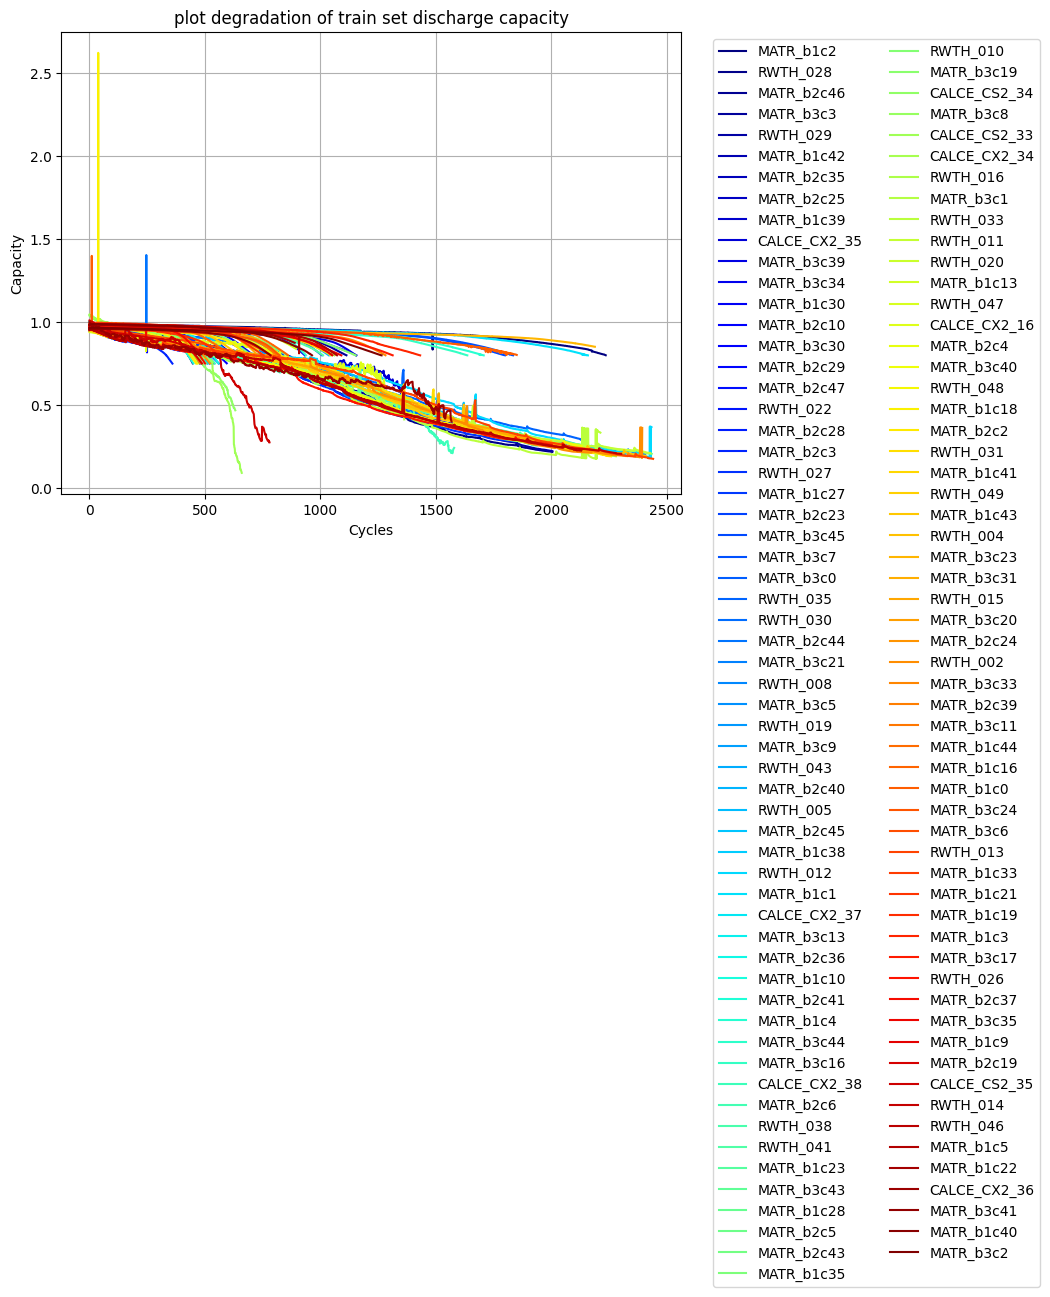

In [75]:
# display (train set) all battery cells' capacity degradation curve using plot_capacity_degradation function

plot_capacity_degradation(train_cells, title='plot degradation of train set discharge capacity', figsize=(8,6), n_legend_cols=2)

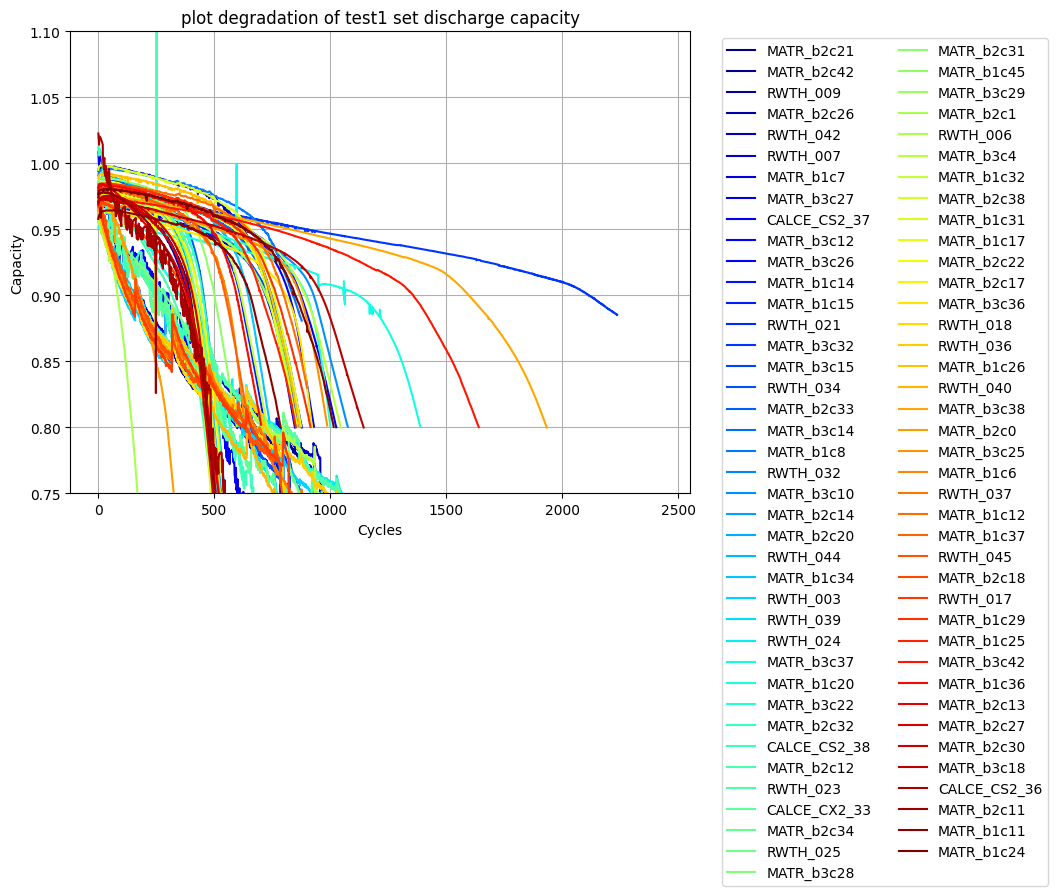

In [76]:
# display (test set) all battery cells' capacity degradation curve using plot_capacity_degradation function

plot_capacity_degradation(test_cells, title='plot degradation of test1 set discharge capacity', figsize=(8,6), n_legend_cols=2, ylim=(0.75,1.1))

In [77]:
# plot cycle raw attribute such as "voltage_in_V","current_in_A","charge_capacity_in_Ah","discharge_capacity_in_Ah"...

cell_0 = train_cells[5]
indices = [i for i in range(0, 500, 2) if i!=10 ]
plot_cycle_attribute(cell_0.cycle_data, 'voltage_in_V', cycle_indices=indices, figsize=(10, 4))

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x9542e4040>
Traceback (most recent call last):
  File "/Users/macuser/anaconda3/envs/BatteryML/lib/python3.10/site-packages/matplotlib/transforms.py", line 209, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


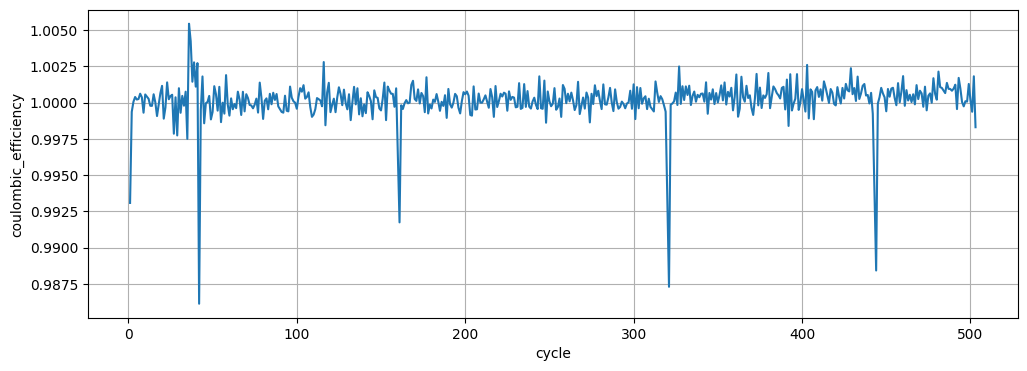

In [68]:
# plot cycle attribute such as "coulombic_efficiency"...
indices = [i for i in range(500) if i!=10 ]
plot_cycle_attribute(cell_0.cycle_data, 'coulombic_efficiency', cycle_indices=indices)

## Train and evaluate model

In [3]:
# train model, and the model will be trained according to the configuration you previously filled out in the config file
train_loss , test_loss = pipeline.train()

Traning:   0%|          | 0/5000 [00:00<?, ?it/s]


ValueError: not enough values to unpack (expected 4, got 2)

In [1]:
# Also you can use a previously trained model to do evaluation on this data
# test_loss = pipeline.evaluate(checkpoint='<your checkpoint path>')

## Plot result

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


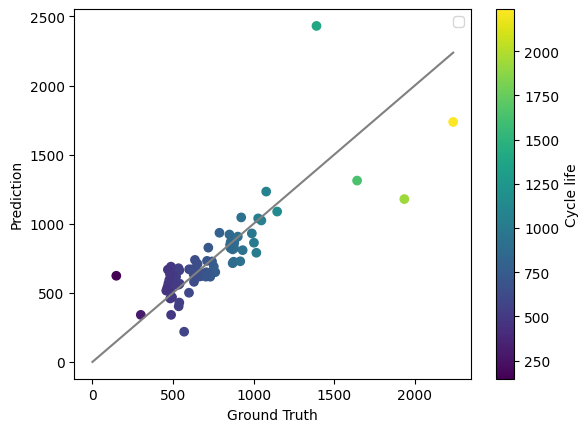

In [62]:
ground_truth = pipeline.target.to('cpu')
prediction = pipeline.prediction.to('cpu')
plot_result(ground_truth, prediction)

# Baseline

In [5]:
import os
import pandas as pd
config_dir = 'configs/baselines/'
data1 = 'mix'
data2 = 'mix'
result=[]
for method_type in os.listdir(config_dir):
    for method in os.listdir(os.path.join(config_dir, method_type)):
        print(method)
        config_path = os.path.join(config_dir, method_type, method, f'{data1}.yaml')
        print(config_path)
        pipeline = Pipeline(config_path=config_path,
                    device='cpu', 
                    workspace=f'workspaces/{method}')
        train_loss , test_loss = pipeline.train()
        
        config_path = os.path.join(config_dir, method_type, method, f'{data2}.yaml')
        pipeline = Pipeline(config_path=config_path,
                    device='cpu', 
                    workspace=f'workspaces/{method}')
        test2_loss = pipeline.evaluate(checkpoint=f'workspaces/{method}/latest.ckpt')
      
        result.append([method, train_loss, test_loss, test2_loss])

res = pd.DataFrame(data=result, columns=['method', 'train_RMSE', 'test_RMSE', 'test2_RMSE'])

cnn
configs/baselines/nn_models
Seed is set to 0.


Info: Load datasets from cache cache/battery_cache_6056bd4ff6c366ab143b9e68727648bd.pkl.


KeyboardInterrupt: 

In [30]:
res

,method,train_RMSE,test_RMSE,test2_RMSE
0,cnn,32.366676,76.586090,223.972427
1,mlp,82.067879,139.818817,176.538940
2,lstm,29.006718,101.054489,276.896454
3,pcr,77.822910,90.435280,186.539350
4,dummy,327.207458,398.822845,510.628448
5,gpr,0.000017,153.915929,223.833722
6,variance_model,122.053421,136.129623,211.236359
7,discharge_model,79.227798,329.047943,148.581955
8,ridge,45.890852,115.789170,183.799724
9,plsr,53.138890,103.652601,180.533888
